# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [1]:
#Import your libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import time
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import hdbscan
from sklearn.mixture import GaussianMixture as GMM
import scipy.cluster.hierarchy as sch

In [2]:
#Load the dataset and explore its variables
data = pd.read_csv('snsdata.csv')
display(data.head())
display(data.describe())
display(data.dtypes)
display(data.isnull().mean()[data.isnull().mean() > 0])
print(data.shape)

gradyear gender     age  friends  basketball  football  soccer  softball  \
0      2006      M  18.982        7           0         0       0         0   
1      2006      F  18.801        0           0         1       0         0   
2      2006      M  18.335       69           0         1       0         0   
3      2006      F  18.875        0           0         0       0         0   
4      2006    NaN  18.995       10           0         0       0         0   

   volleyball  swimming  ...  blonde  mall  shopping  clothes  hollister  \
0           0         0  ...       0     0         0        0          0   
1           0         0  ...       0     1         0        0          0   
2           0         0  ...       0     0         0        0          0   
3           0         0  ...       0     0         0        0          0   
4           0         0  ...       0     0         2        0          0   

   abercrombie  die  death  drunk  drugs  
0            0    0      0      0      0  
1            0    0      0      0      0  
2            0    0      1      0      0  
3            0    0      0      0      0  
4            0    0      0      1      1  

[5 rows x 40 columns]

gradyear           age       friends    basketball      football  \
count  30000.000000  24914.000000  30000.000000  30000.000000  30000.000000   
mean    2007.500000     17.993950     30.179467      0.267333      0.252300   
std        1.118053      7.858054     36.530877      0.804708      0.705357   
min     2006.000000      3.086000      0.000000      0.000000      0.000000   
25%     2006.750000     16.312000      3.000000      0.000000      0.000000   
50%     2007.500000     17.287000     20.000000      0.000000      0.000000   
75%     2008.250000     18.259000     44.000000      0.000000      0.000000   
max     2009.000000    106.927000    830.000000     24.000000     15.000000   

             soccer      softball    volleyball     swimming  cheerleading  \
count  30000.000000  30000.000000  30000.000000  30000.00000  30000.000000   
mean       0.222767      0.161200      0.143133      0.13440      0.106633   
std        0.917226      0.739707      0.639943      0.51699      0.514333   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        0.000000      0.000000      0.000000      0.00000      0.000000   
50%        0.000000      0.000000      0.000000      0.00000      0.000000   
75%        0.000000      0.000000      0.000000      0.00000      0.000000   
max       27.000000     17.000000     14.000000     31.00000      9.000000   

       ...        blonde          mall      shopping      clothes  \
count  ...  30000.000000  30000.000000  30000.000000  30000.00000   
mean   ...      0.098933      0.257367      0.353000      0.14850   
std    ...      1.942319      0.695758      0.724391      0.47264   
min    ...      0.000000      0.000000      0.000000      0.00000   
25%    ...      0.000000      0.000000      0.000000      0.00000   
50%    ...      0.000000      0.000000      0.000000      0.00000   
75%    ...      0.000000      0.000000      1.000000      0.00000   
max    ...    327.000000     12.000000     11.000000      8.00000   

          hollister   abercrombie           die         death         drunk  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.069867      0.051167      0.184100      0.114233      0.087967   
std        0.346779      0.279555      0.624516      0.436796      0.399125   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000      8.000000     22.000000     14.000000      8.000000   

              drugs  
count  30000.000000  
mean       0.060433  
std        0.345522  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       16.000000  

[8 rows x 39 columns]

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object

gender    0.090800
age       0.169533
dtype: float64

(30000, 40)


## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [3]:
#Age needs to be int as is not common to see 18.9 years old.

#Changing ages that are not null from float to int
data['age'][data['age'] > 0] = data['age'][data['age'] > 0].apply(lambda x: round(x))

#Filling na's with mean - - - - - -Mean and Median are almost the same.
data['age'] = data['age'].fillna(value = round(data.age.mean())).astype(int)

#Removing outliers using z-score
z=np.abs(stats.zscore(data.age))
data['zAge'] = z
data = data[data['zAge']< 0.5]
data.drop('zAge', axis = 1, inplace = True)

#After removing NaN and Outliers we are left with people with 15-21 years old.

<ipython-input-3-79c7b84767c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'][data['age'] > 0] = data['age'][data['age'] > 0].apply(lambda x: round(x))


In [4]:
data.shape

(29610, 40)

In [5]:
#Gender. Filling Nulls.

print(data['gender'].isnull().mean()) #9% of data missing
data['gender'].fillna(value="Other",inplace =True)
data['gender'].value_counts()

0.09078014184397164


F        21788
M         5134
Other     2688
Name: gender, dtype: int64

In the preferences columns there are really a lot of outliers

## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

#### Comment
Outliers in preferences we keep them. I really don't know what each number represents so I will keep them.
Outliers in Age are removed.
Outliera in Friends

Almost no columns are correlated.
 * Band and x March have 0.5 
 * Hollister x Abercrombie have 0.48
 
Maybe we can group those 2 column that have ~0.5 corr.

In [6]:
#Your code here:+
corr = data.corr()
px.imshow(corr,
          width=850,
          height=850)

<ipython-input-7-6526f349ebdd>:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



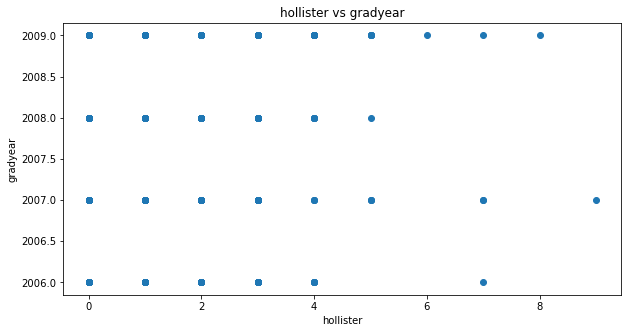

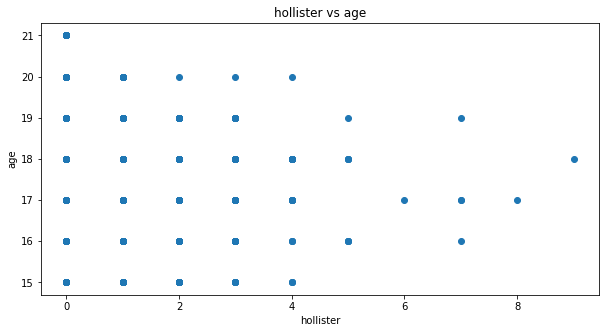

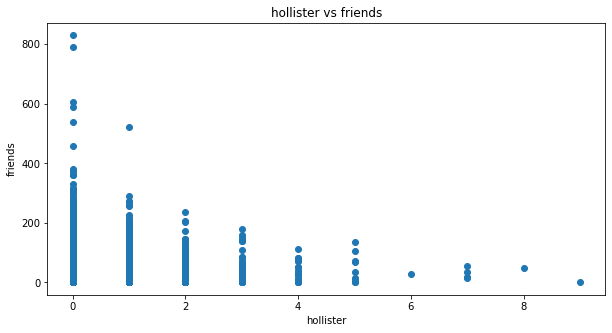

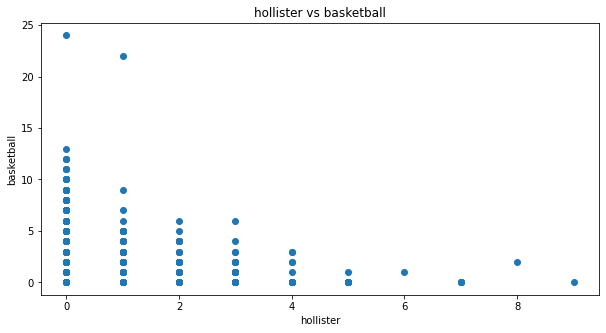

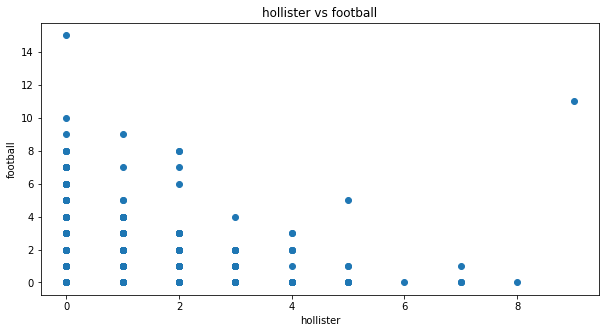

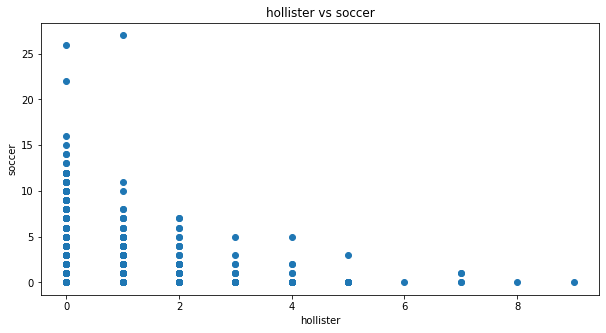

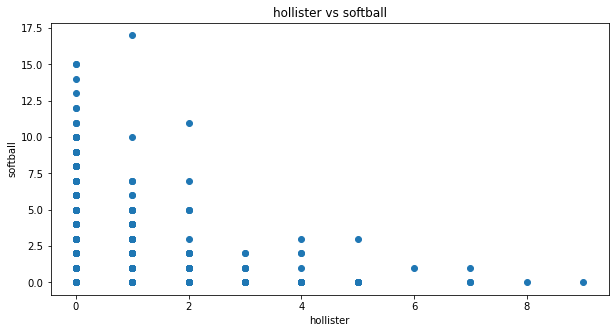

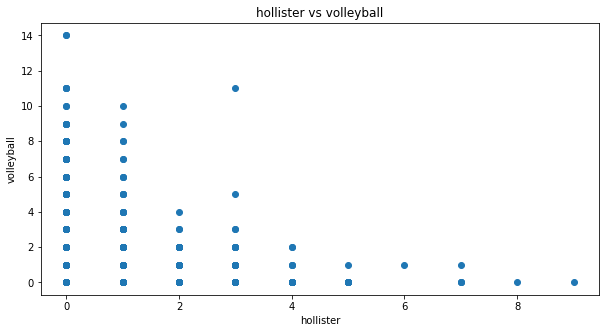

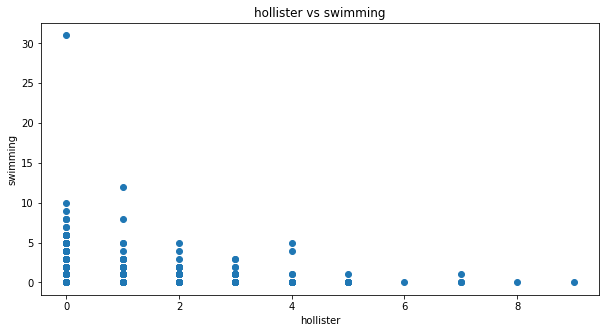

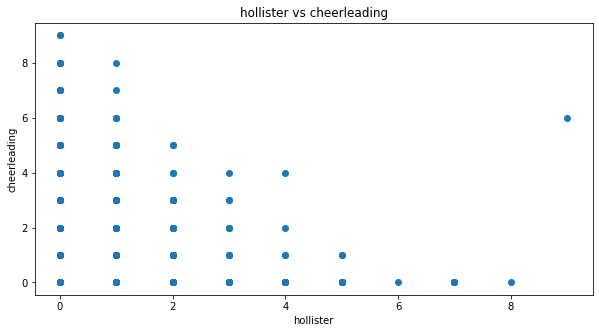

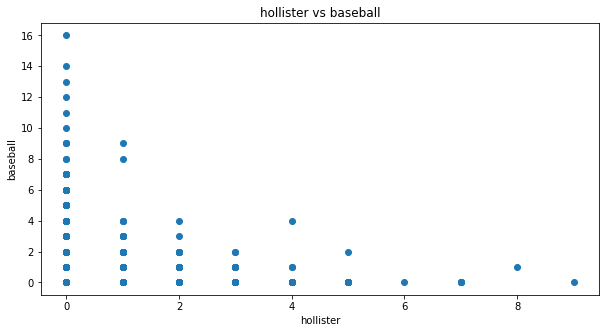

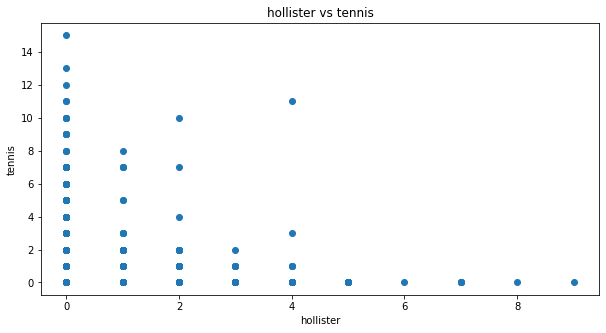

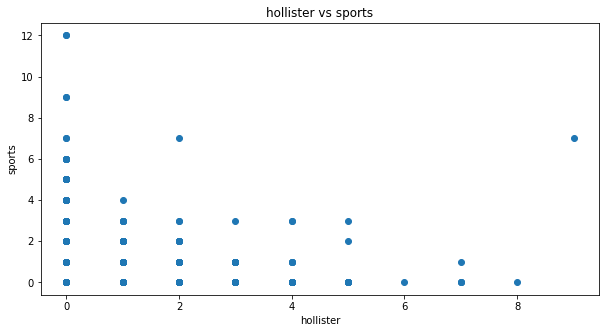

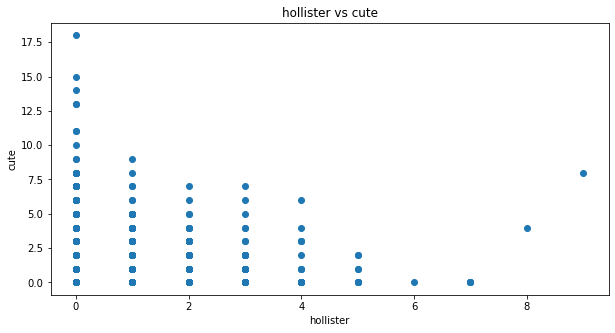

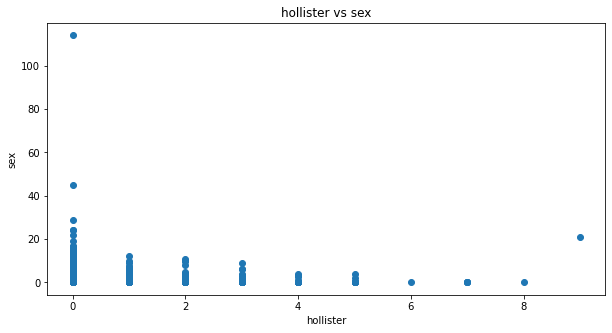

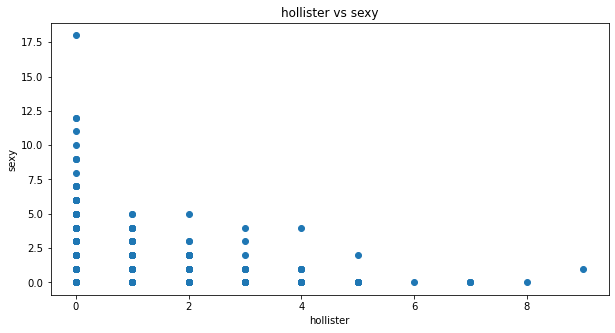

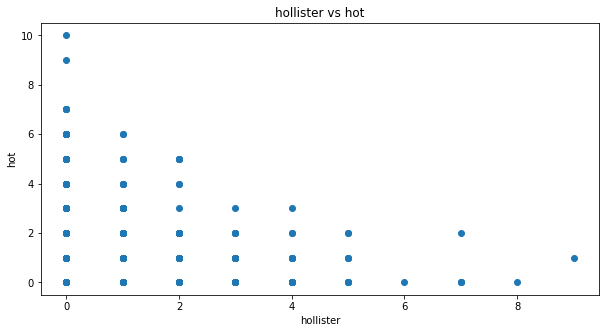

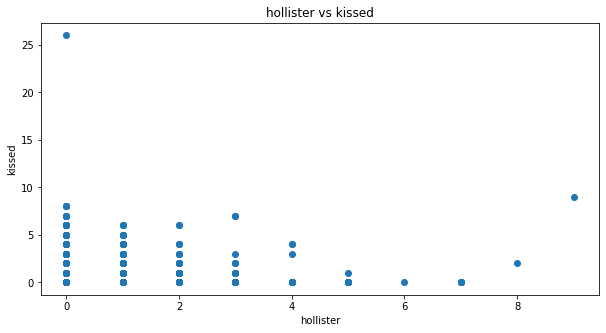

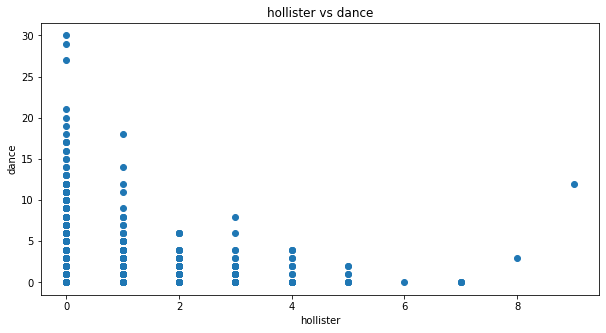

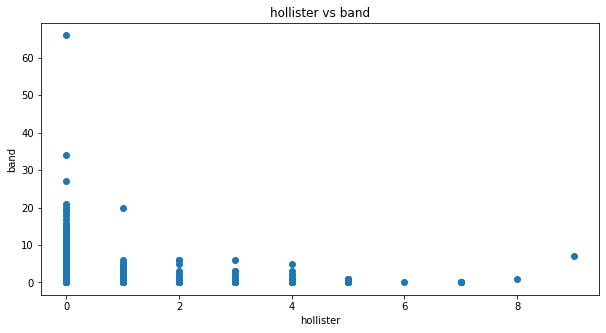

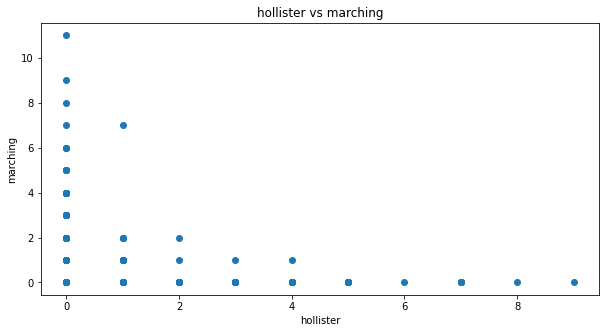

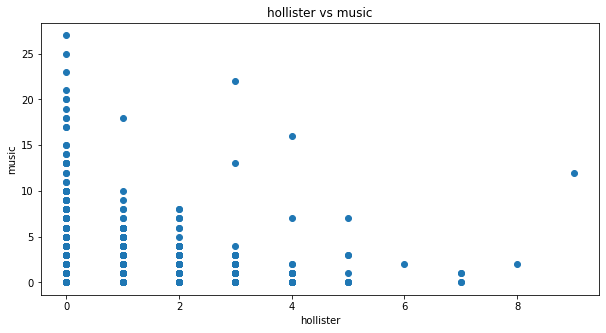

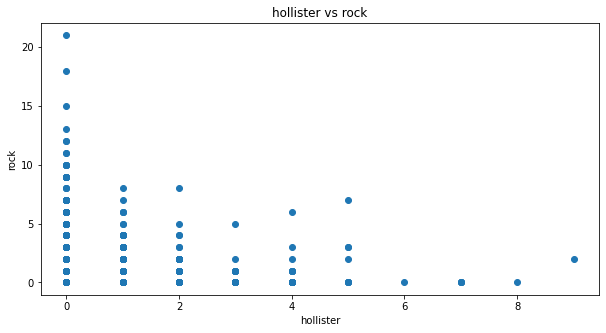

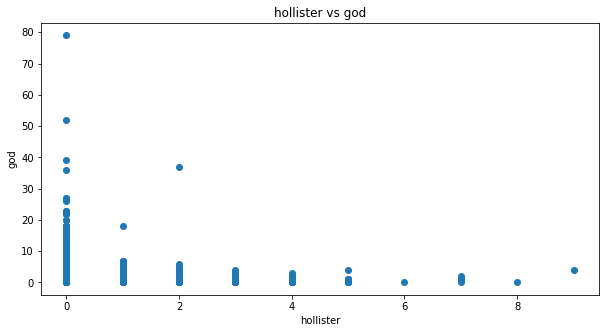

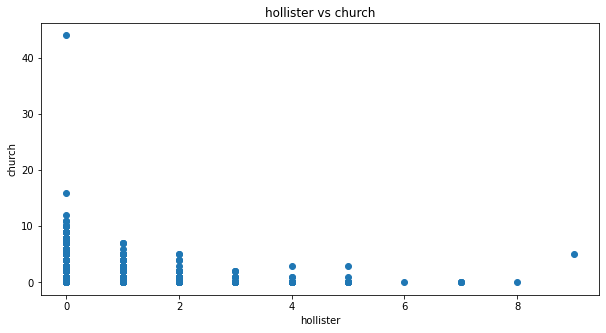

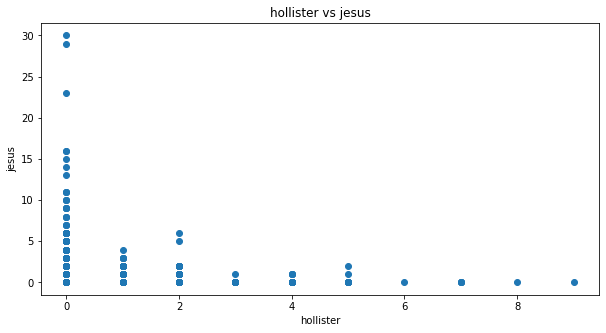

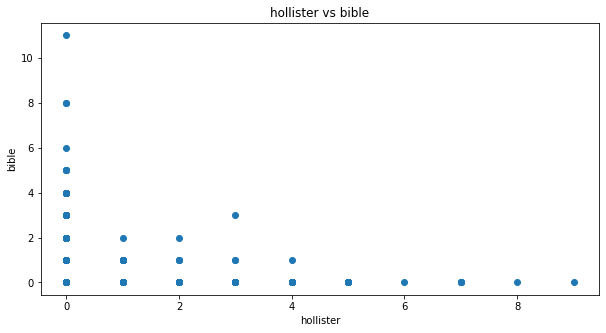

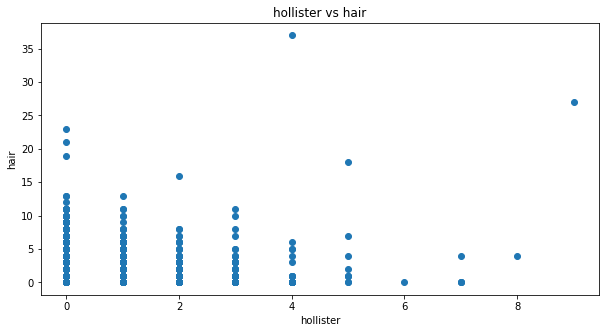

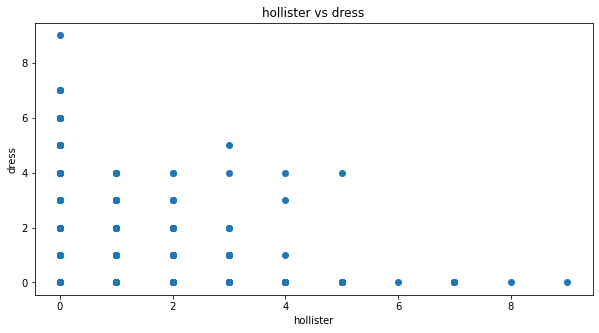

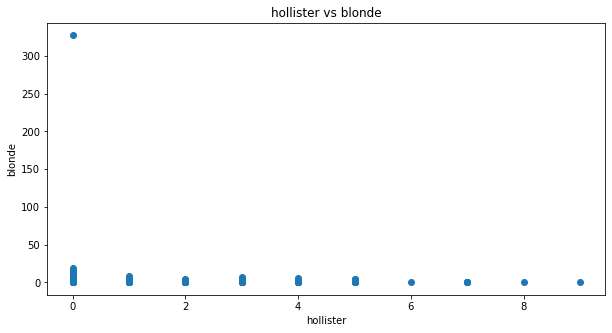

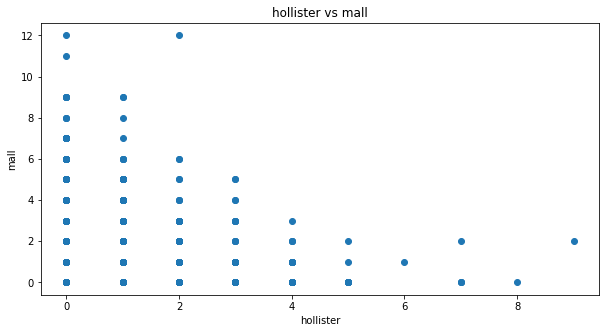

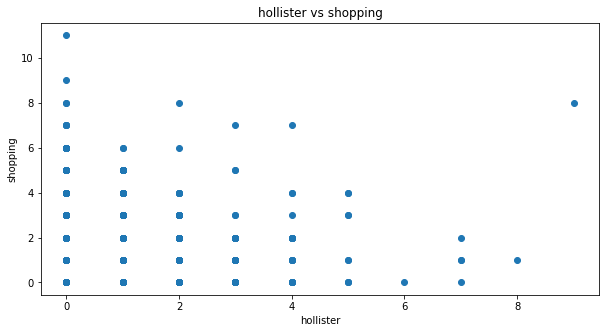

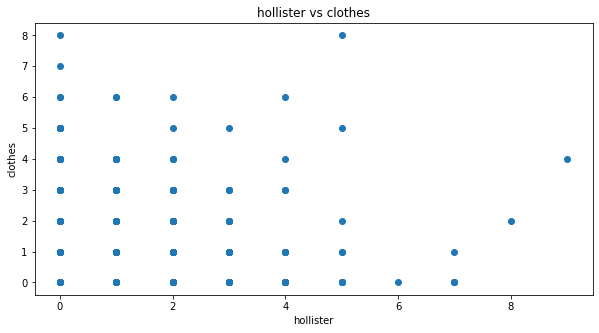

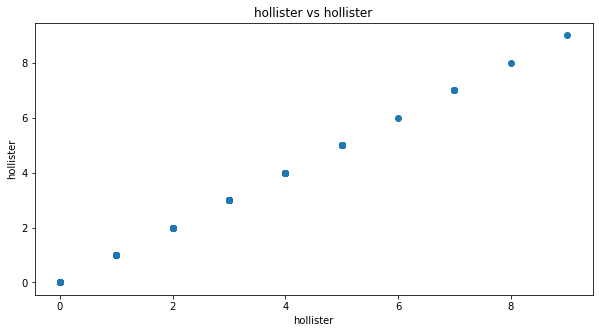

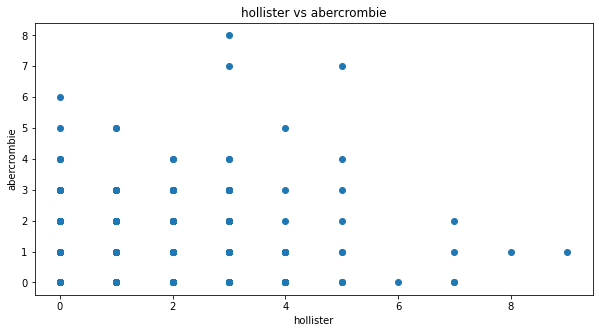

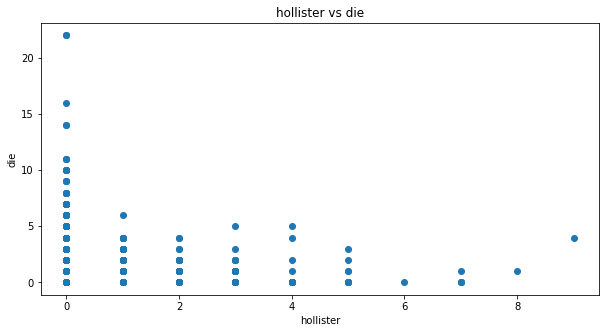

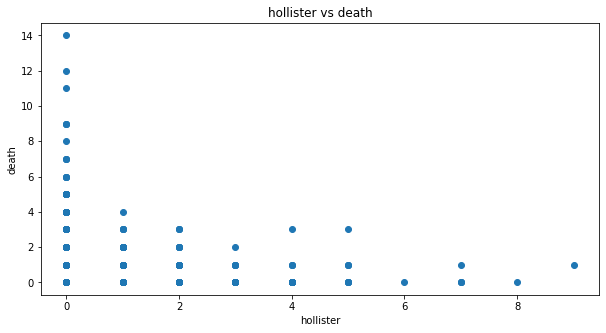

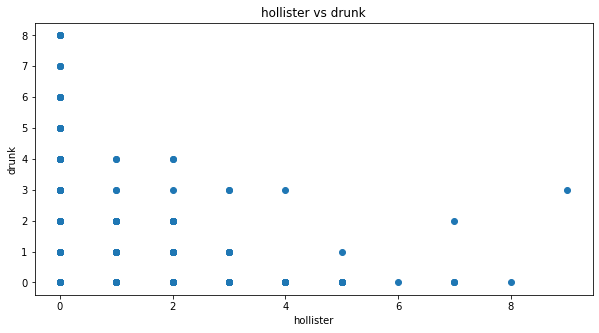

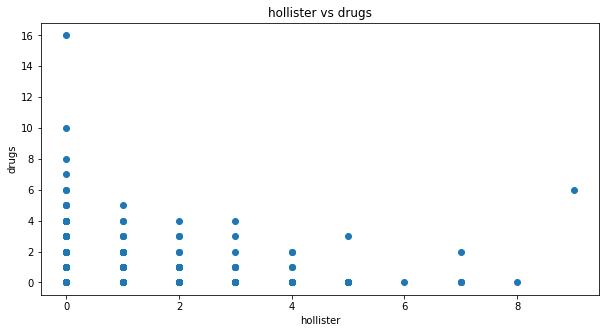

In [7]:
for col in data._get_numeric_data():
    fig, ax =plt.subplots(figsize= (10,5), sharex = True)
    ax.scatter(x = data.hollister,y =data[col])
    ax.set_xlabel("hollister")
    ax.set_ylabel(col)
    ax.set_title(f"hollister vs {col}")
    

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [8]:
#Your code here:

#Tranform M and F to ordinal.
data['gender'] = LabelEncoder().fit_transform(data['gender'])

#Data between 0 and 1 so those outliers don't affect hard the model.
data = pd.DataFrame(MinMaxScaler().fit_transform(data), columns = data.columns)
display(pd.DataFrame({'OG':['M','F','Other'],'Encoded':data['gender'].value_counts().index}))
display(data)

OG  Encoded
0      M      0.0
1      F      0.5
2  Other      1.0

gradyear  gender       age   friends  basketball  football  soccer  \
0           0.0     0.5  0.666667  0.008434    0.000000  0.000000     0.0   
1           0.0     0.0  0.666667  0.000000    0.000000  0.066667     0.0   
2           0.0     0.5  0.500000  0.083133    0.000000  0.066667     0.0   
3           0.0     0.0  0.666667  0.000000    0.000000  0.000000     0.0   
4           0.0     1.0  0.666667  0.012048    0.000000  0.000000     0.0   
...         ...     ...       ...       ...         ...       ...     ...   
29605       1.0     0.5  0.166667  0.000000    0.000000  0.000000     0.0   
29606       1.0     0.5  0.166667  0.001205    0.000000  0.066667     0.0   
29607       1.0     0.5  0.166667  0.000000    0.000000  0.066667     0.0   
29608       1.0     0.5  0.166667  0.000000    0.000000  0.000000     0.0   
29609       1.0     0.0  0.666667  0.003614    0.083333  0.000000     0.0   

       softball  volleyball  swimming  ...  blonde      mall  shopping  \
0      0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
1      0.000000         0.0       0.0  ...     0.0  0.083333  0.000000   
2      0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
3      0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
4      0.000000         0.0       0.0  ...     0.0  0.000000  0.181818   
...         ...         ...       ...  ...     ...       ...       ...   
29605  0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
29606  0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
29607  0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
29608  0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
29609  0.058824         0.0       0.0  ...     0.0  0.000000  0.000000   

       clothes  hollister  abercrombie  die     death  drunk   drugs  
0          0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
1          0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
2          0.0        0.0          0.0  0.0  0.071429  0.000  0.0000  
3          0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
4          0.0        0.0          0.0  0.0  0.000000  0.125  0.0625  
...        ...        ...          ...  ...       ...    ...     ...  
29605      0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
29606      0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
29607      0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
29608      0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
29609      0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  

[29610 rows x 40 columns]

In [9]:
display(data)
data.isnull().sum()

gradyear  gender       age   friends  basketball  football  soccer  \
0           0.0     0.5  0.666667  0.008434    0.000000  0.000000     0.0   
1           0.0     0.0  0.666667  0.000000    0.000000  0.066667     0.0   
2           0.0     0.5  0.500000  0.083133    0.000000  0.066667     0.0   
3           0.0     0.0  0.666667  0.000000    0.000000  0.000000     0.0   
4           0.0     1.0  0.666667  0.012048    0.000000  0.000000     0.0   
...         ...     ...       ...       ...         ...       ...     ...   
29605       1.0     0.5  0.166667  0.000000    0.000000  0.000000     0.0   
29606       1.0     0.5  0.166667  0.001205    0.000000  0.066667     0.0   
29607       1.0     0.5  0.166667  0.000000    0.000000  0.066667     0.0   
29608       1.0     0.5  0.166667  0.000000    0.000000  0.000000     0.0   
29609       1.0     0.0  0.666667  0.003614    0.083333  0.000000     0.0   

       softball  volleyball  swimming  ...  blonde      mall  shopping  \
0      0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
1      0.000000         0.0       0.0  ...     0.0  0.083333  0.000000   
2      0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
3      0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
4      0.000000         0.0       0.0  ...     0.0  0.000000  0.181818   
...         ...         ...       ...  ...     ...       ...       ...   
29605  0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
29606  0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
29607  0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
29608  0.000000         0.0       0.0  ...     0.0  0.000000  0.000000   
29609  0.058824         0.0       0.0  ...     0.0  0.000000  0.000000   

       clothes  hollister  abercrombie  die     death  drunk   drugs  
0          0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
1          0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
2          0.0        0.0          0.0  0.0  0.071429  0.000  0.0000  
3          0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
4          0.0        0.0          0.0  0.0  0.000000  0.125  0.0625  
...        ...        ...          ...  ...       ...    ...     ...  
29605      0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
29606      0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
29607      0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
29608      0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  
29609      0.0        0.0          0.0  0.0  0.000000  0.000  0.0000  

[29610 rows x 40 columns]

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

<Figure size 2160x720 with 0 Axes>

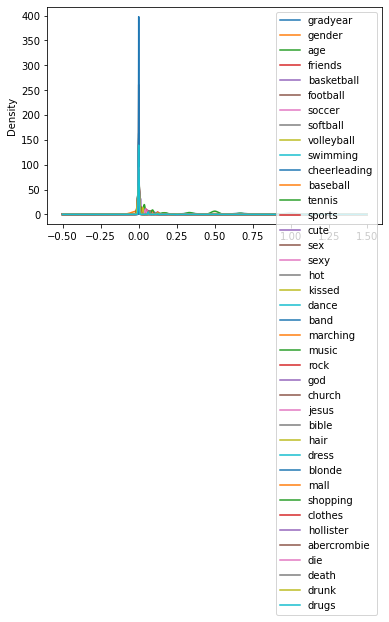

In [10]:
plt.figure(figsize=(30,10))
data.plot(kind='kde')
plt.show()

## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

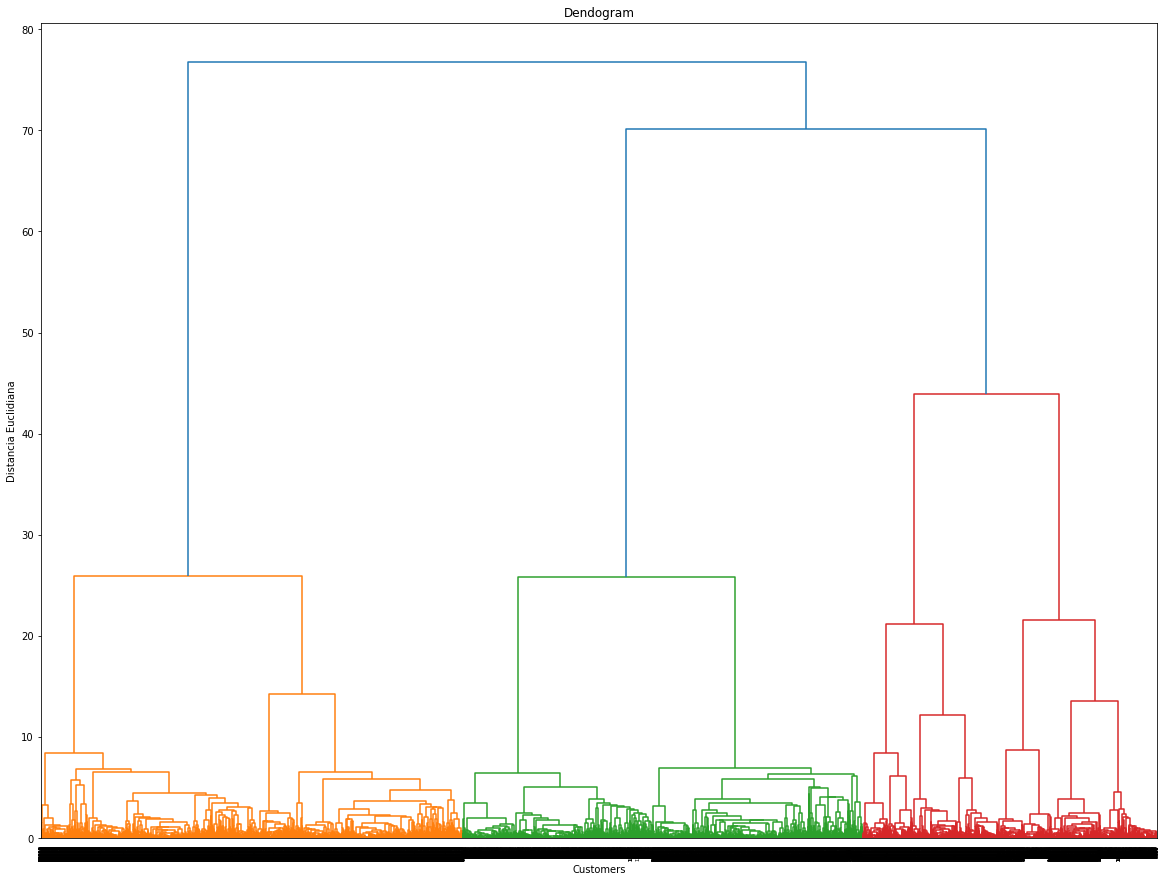

In [11]:
plt.figure(figsize=(20,15))
dendogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [12]:
model = GMM(n_components=4).fit(data)
data['labels'] = model.predict(data)

In [13]:
data['labels'].value_counts()

3    15648
0     5953
1     4174
2     3835
Name: labels, dtype: int64

<ipython-input-14-bc123ffa7b36>:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



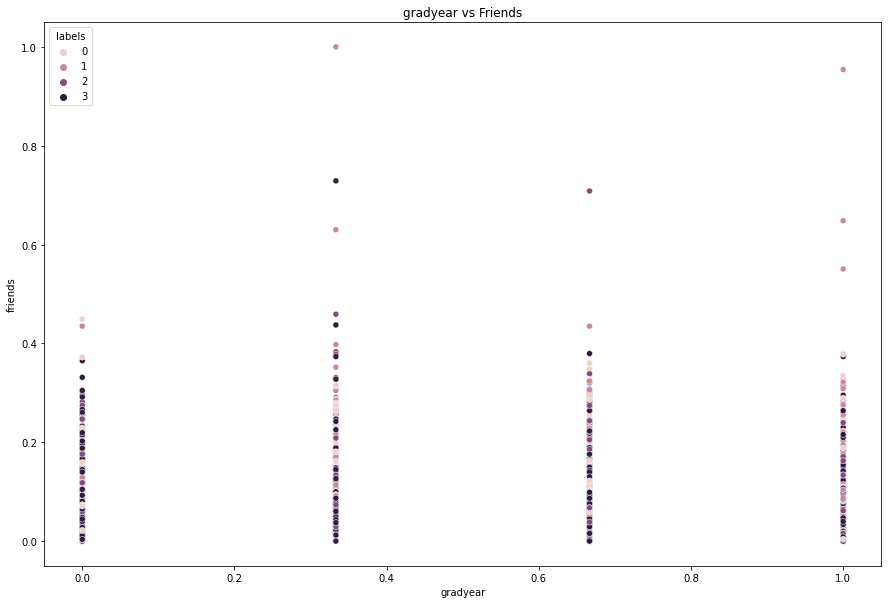

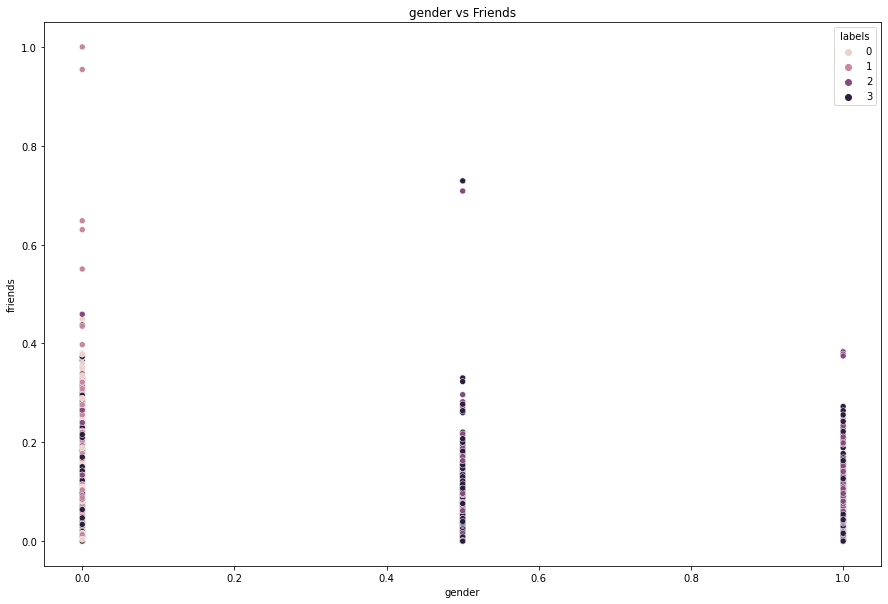

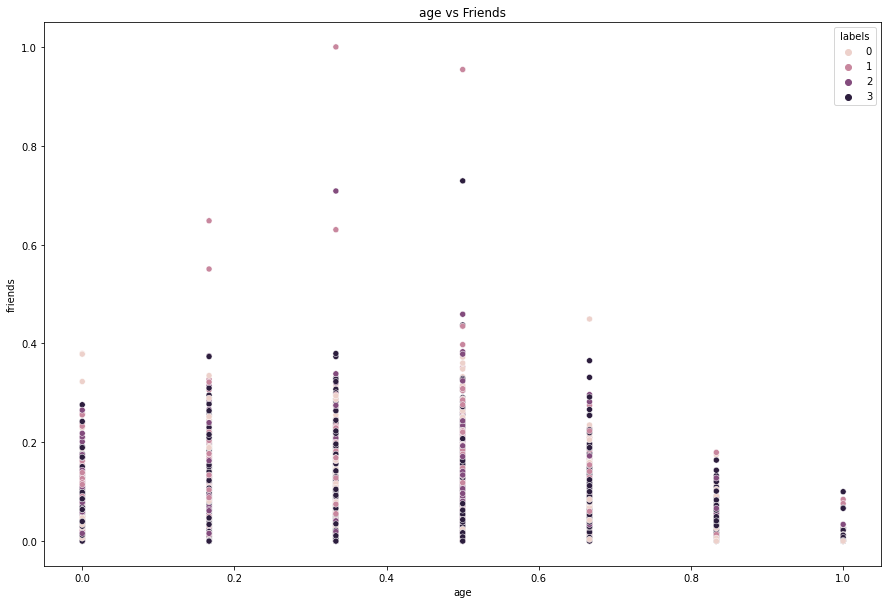

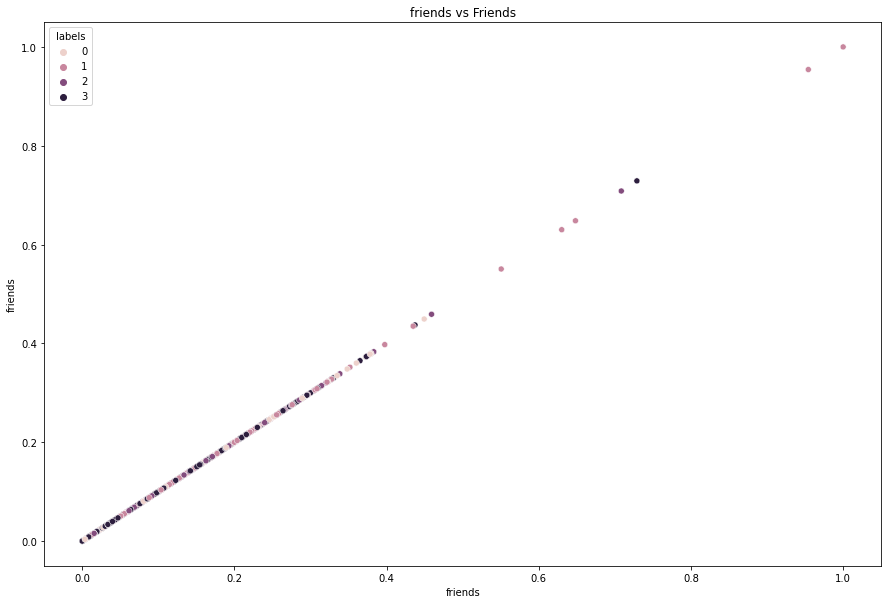

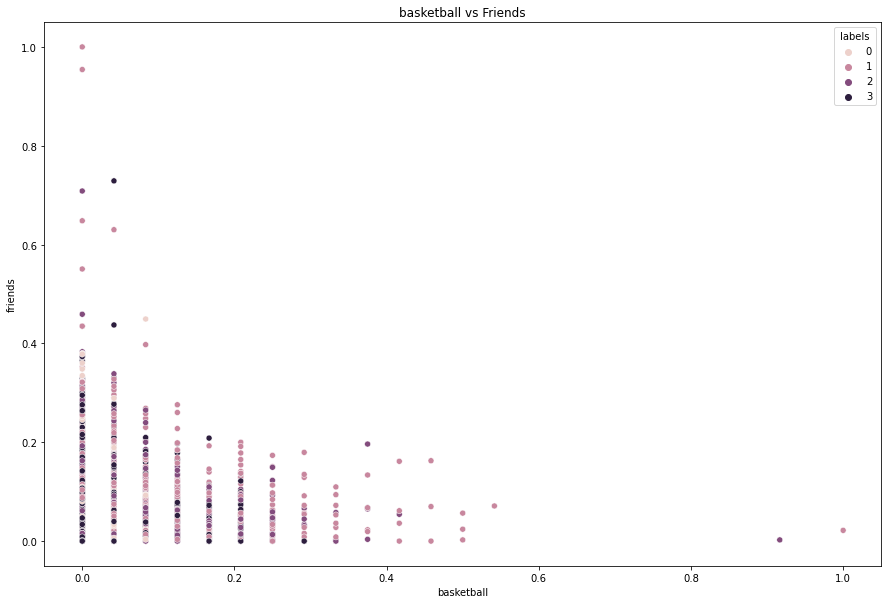

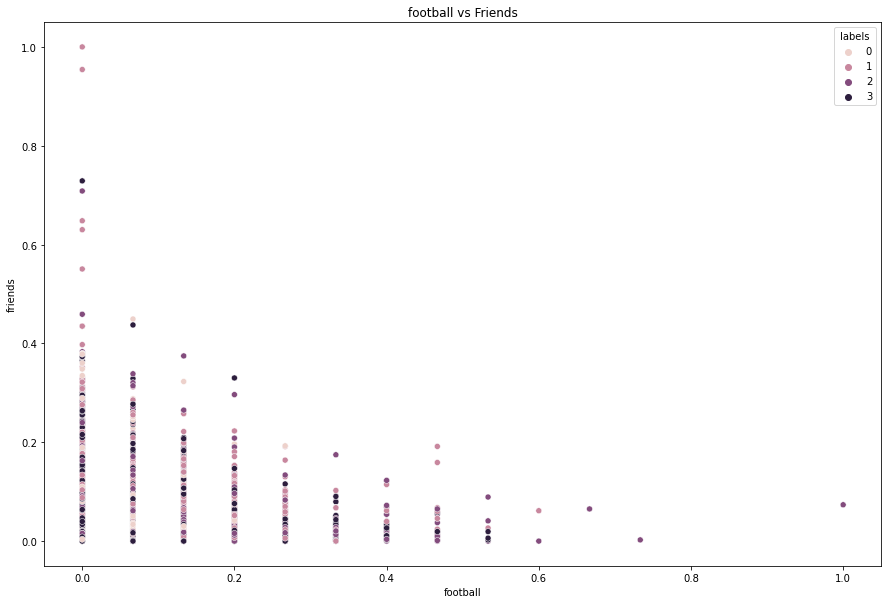

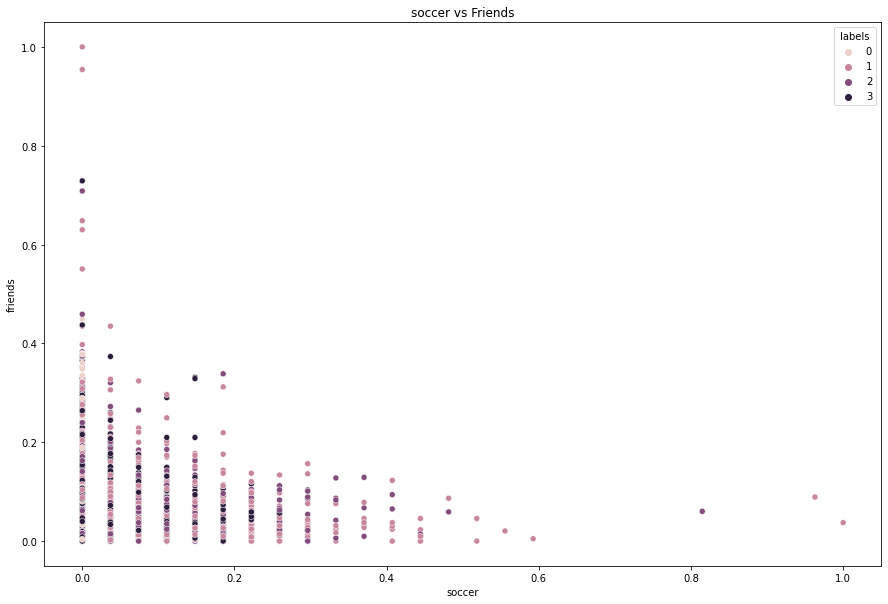

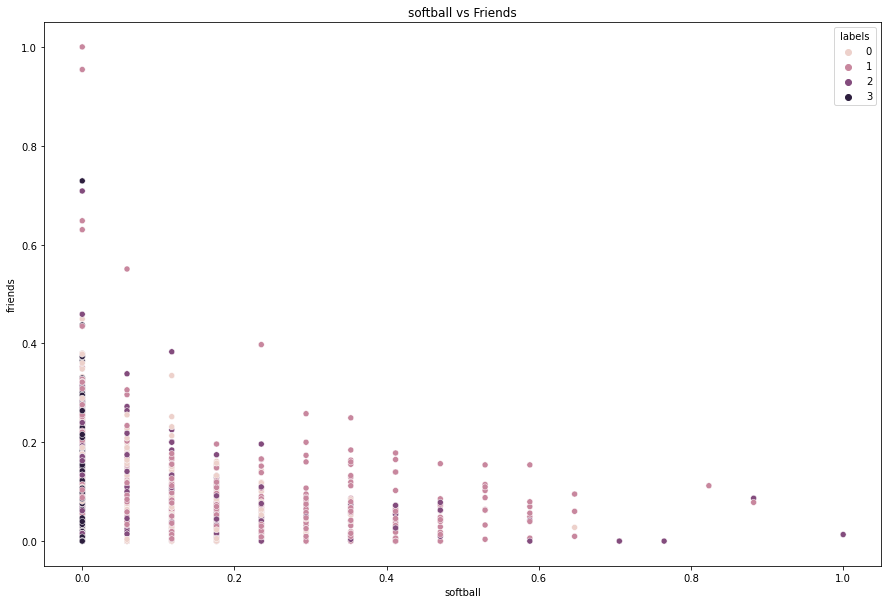

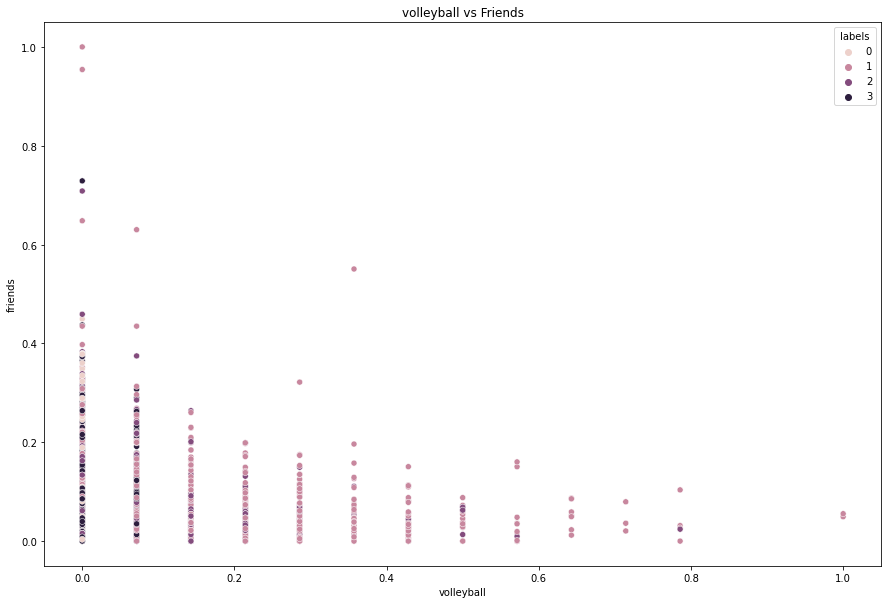

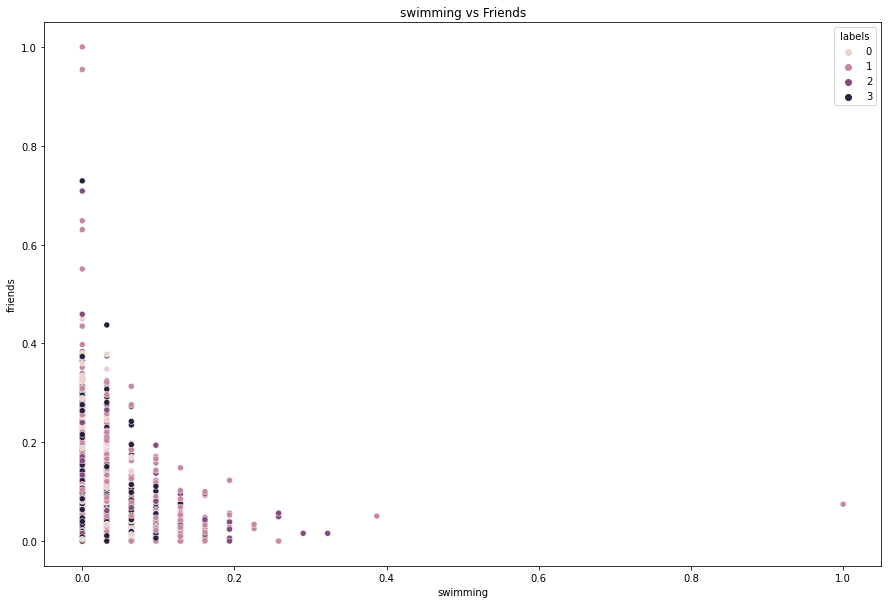

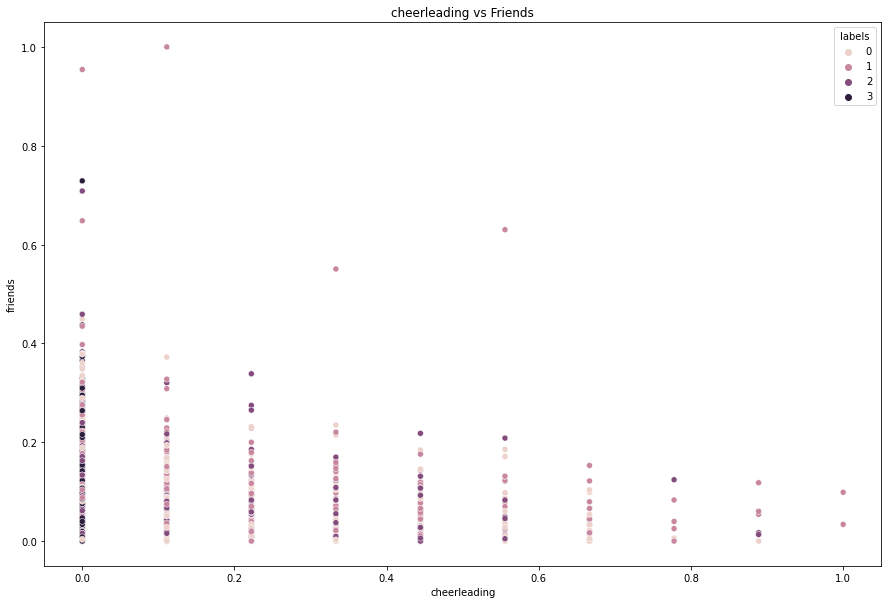

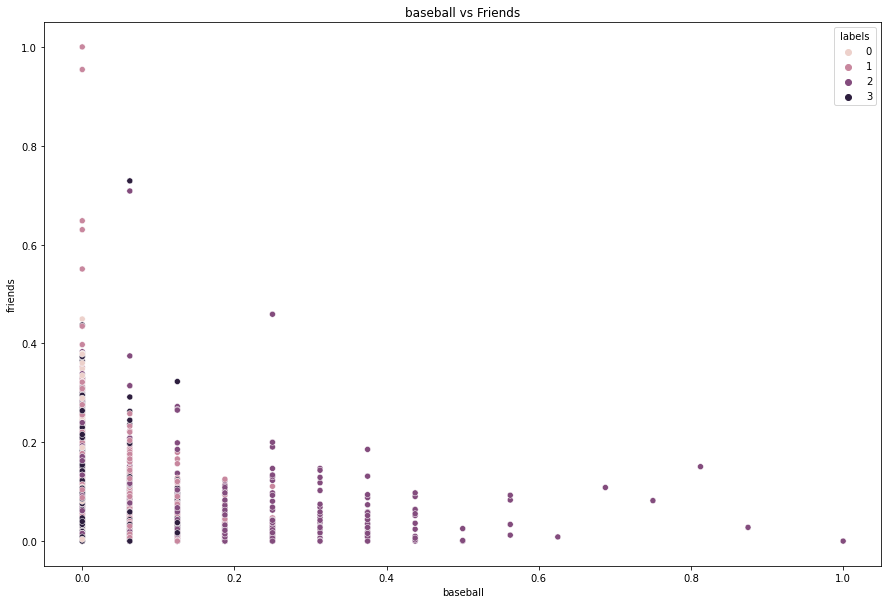

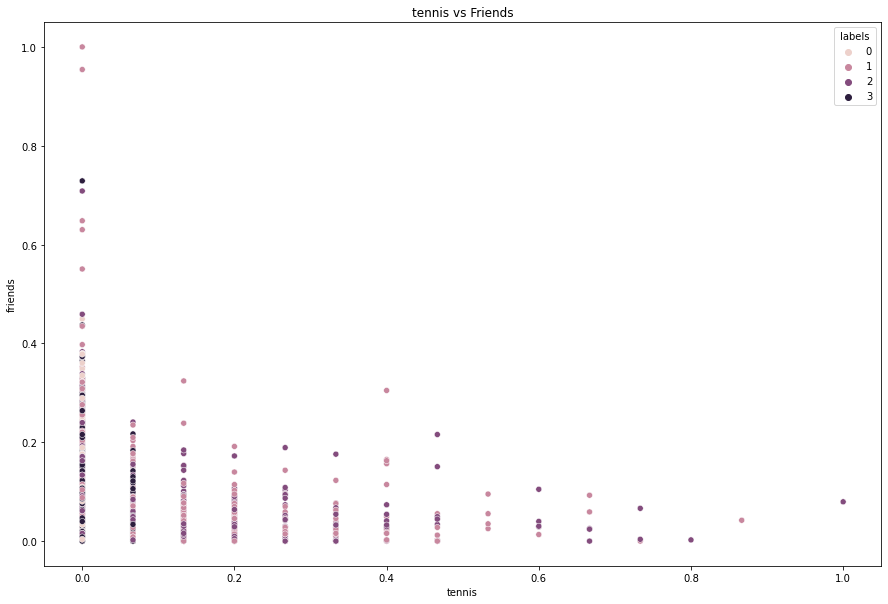

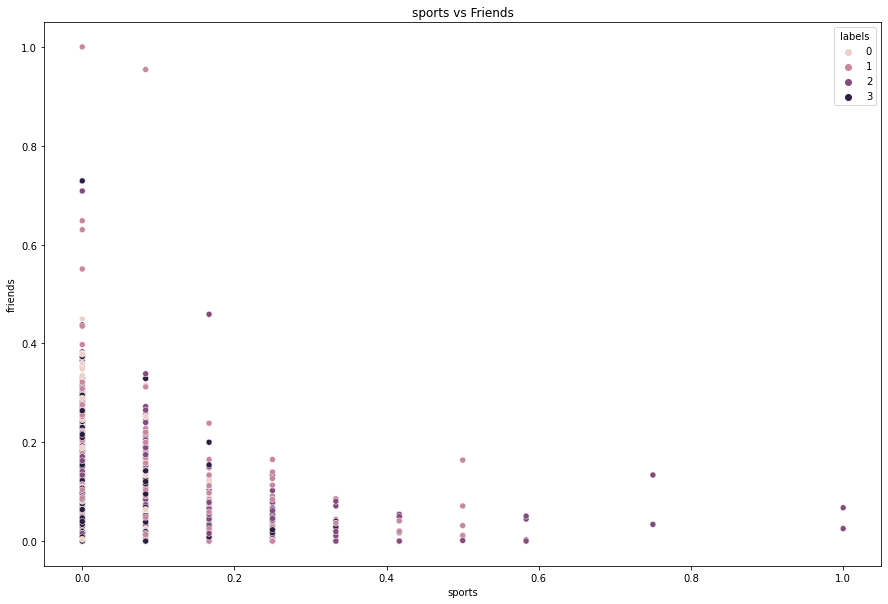

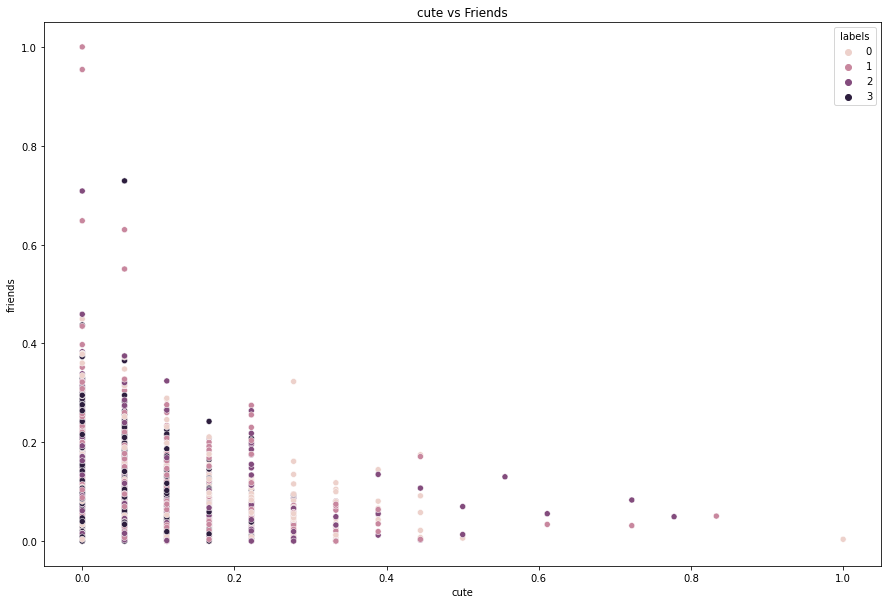

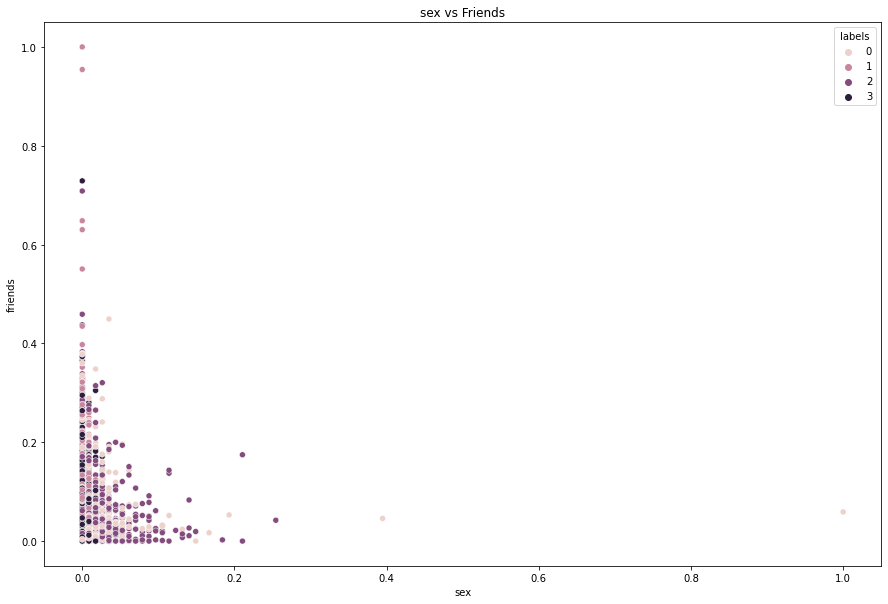

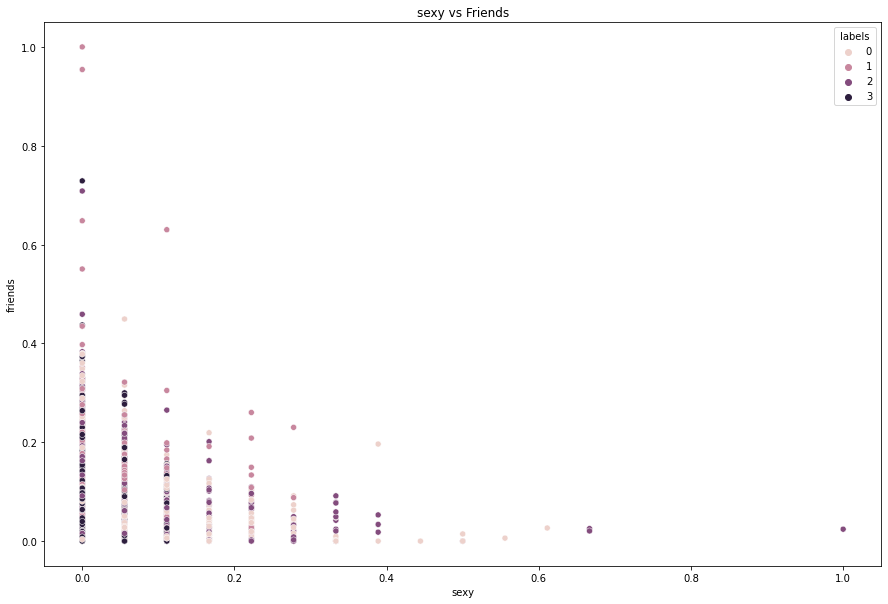

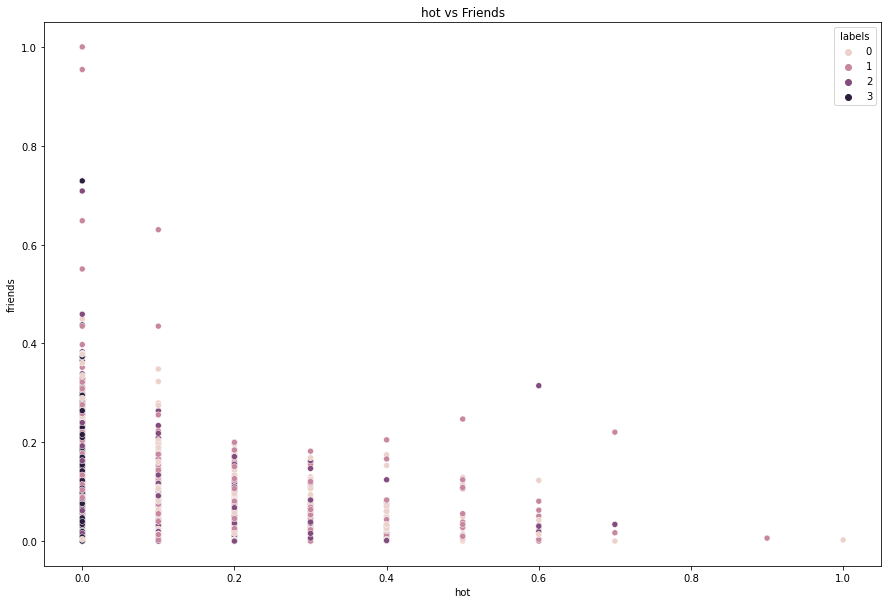

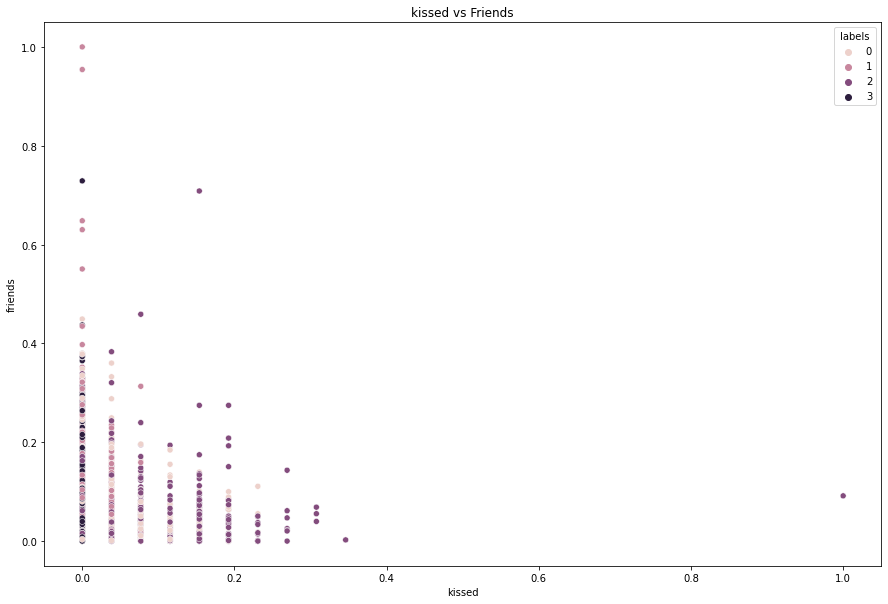

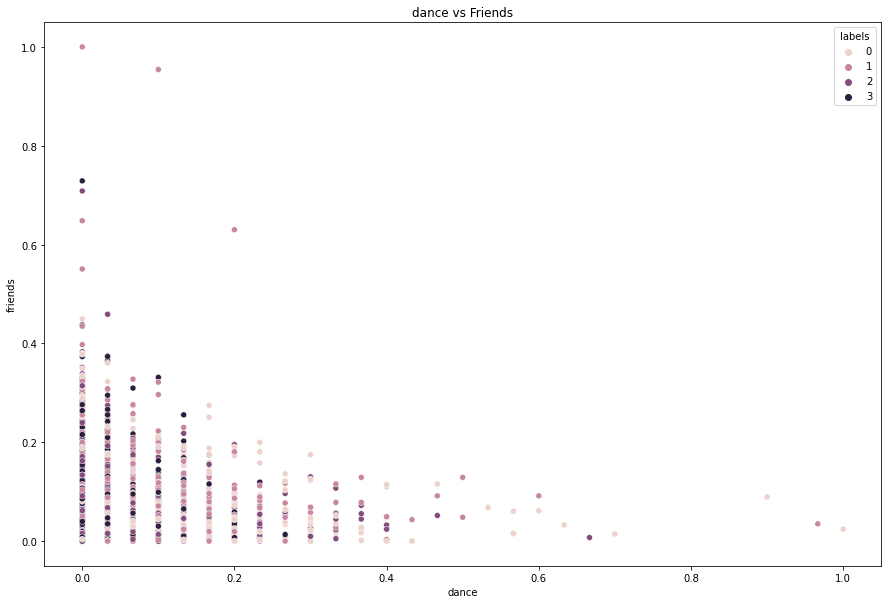

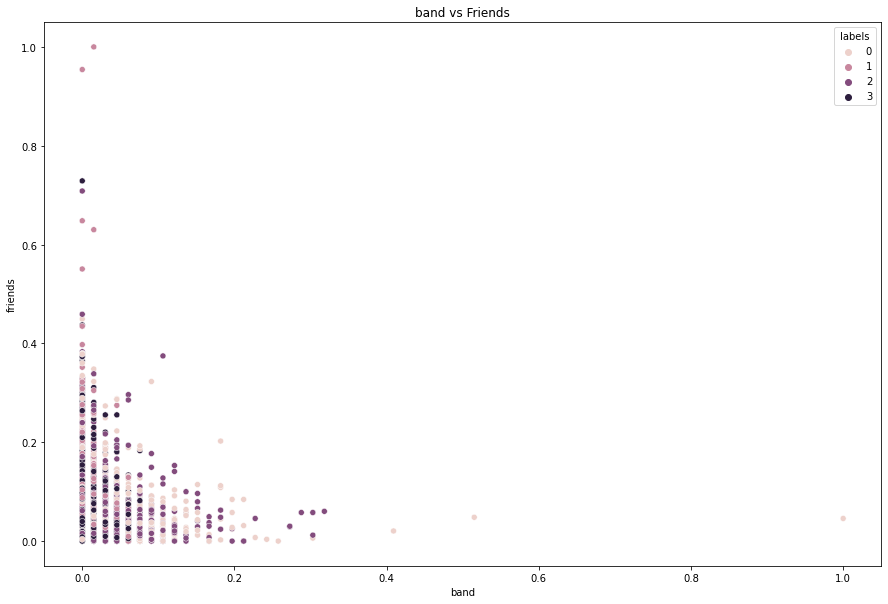

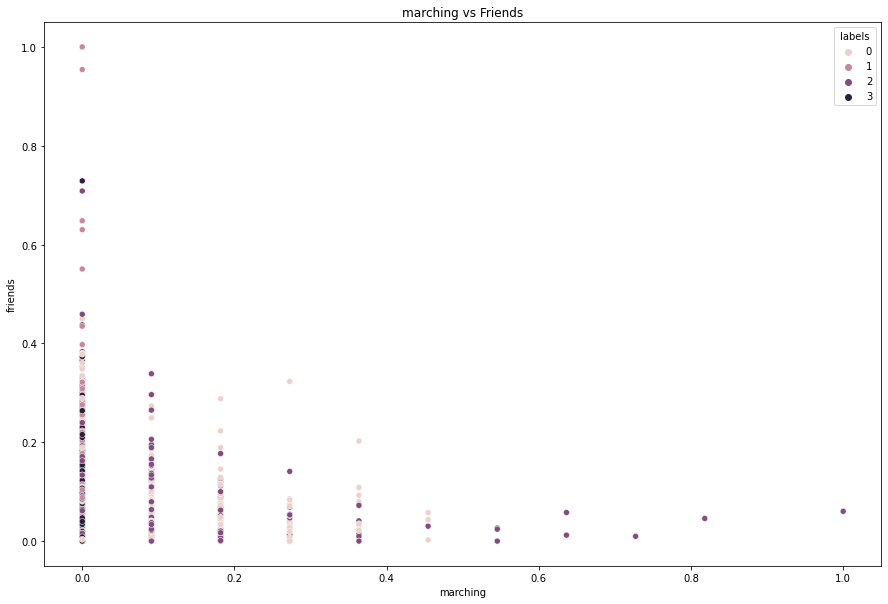

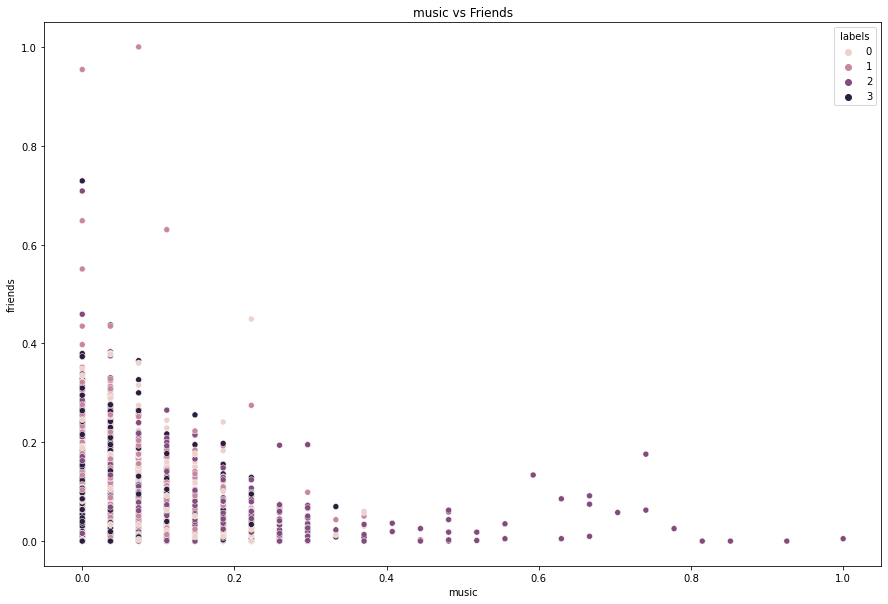

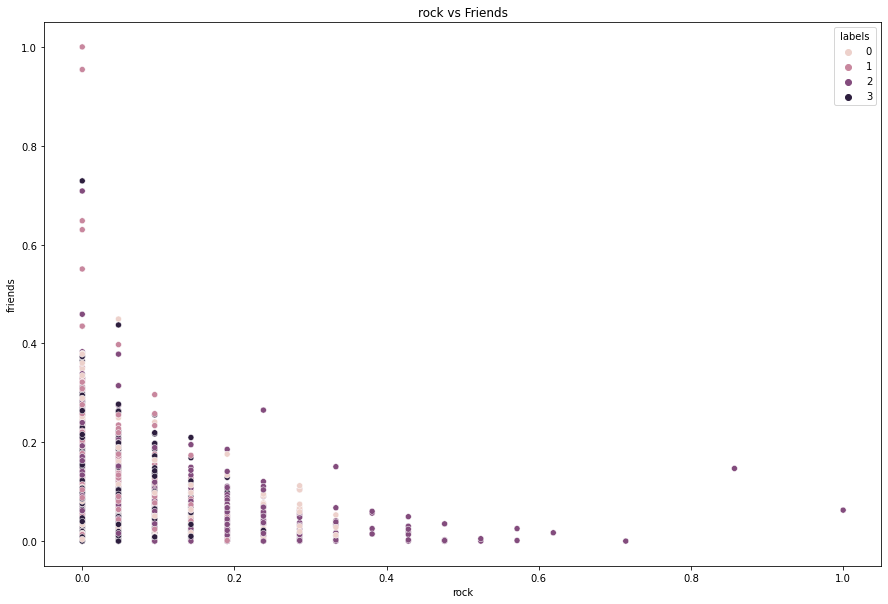

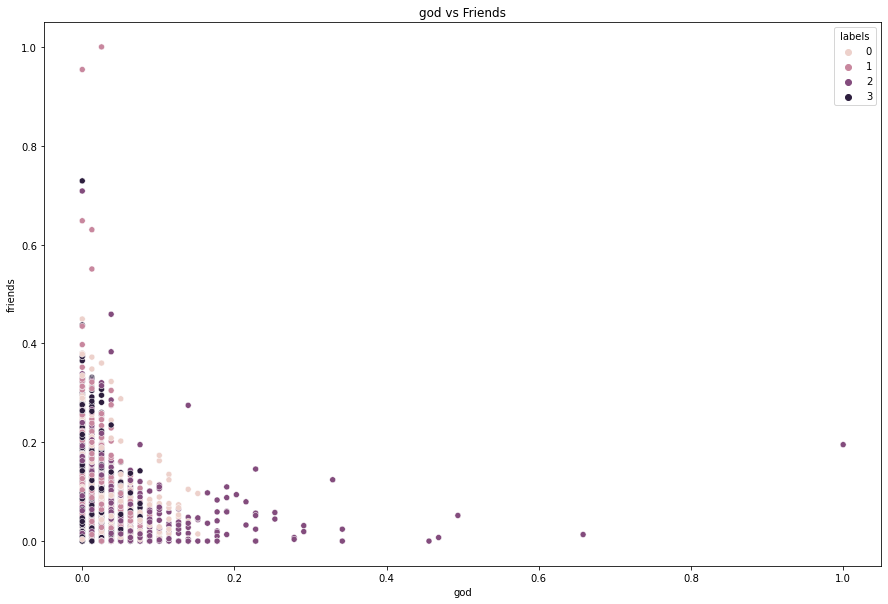

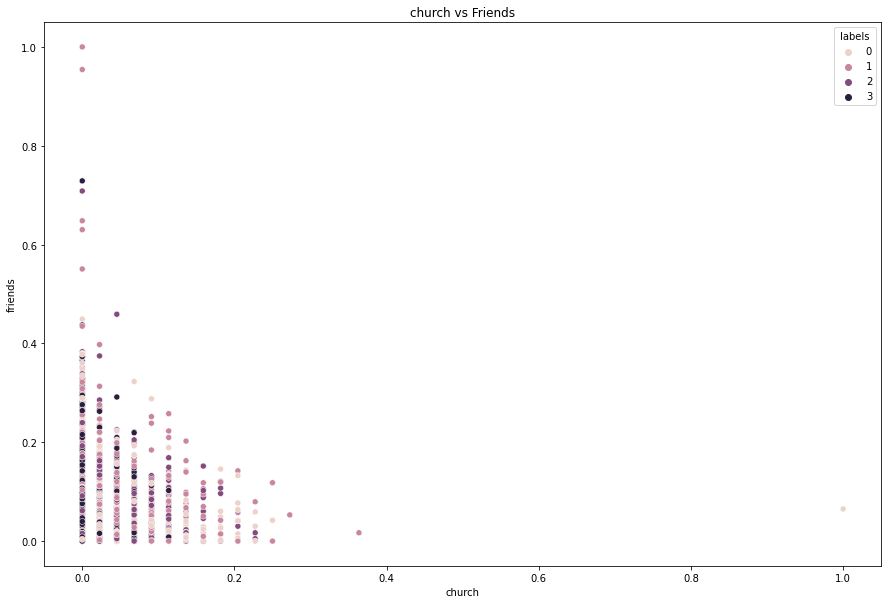

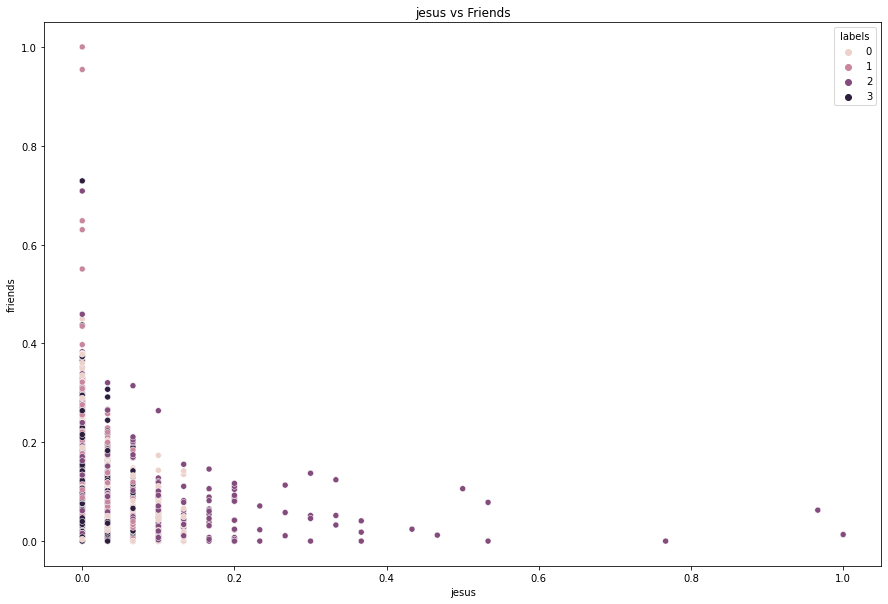

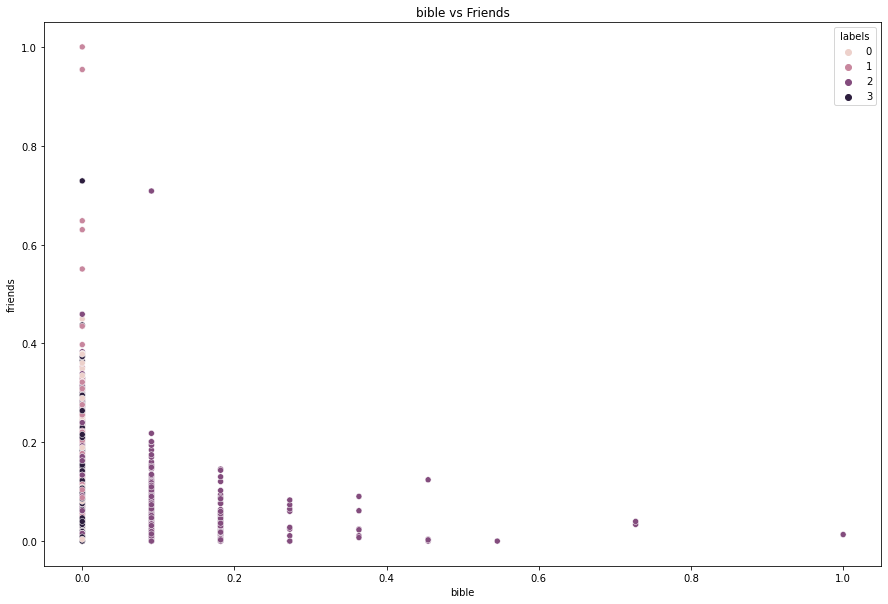

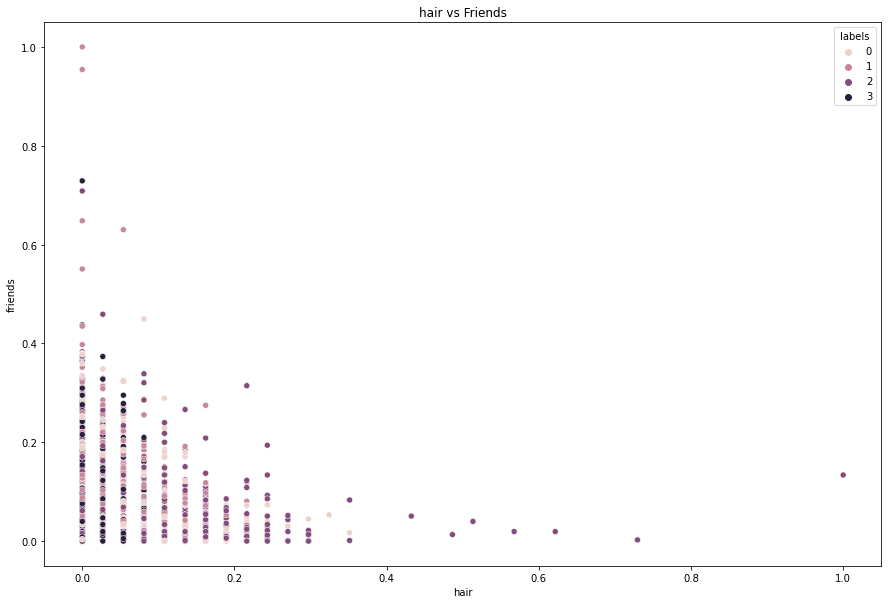

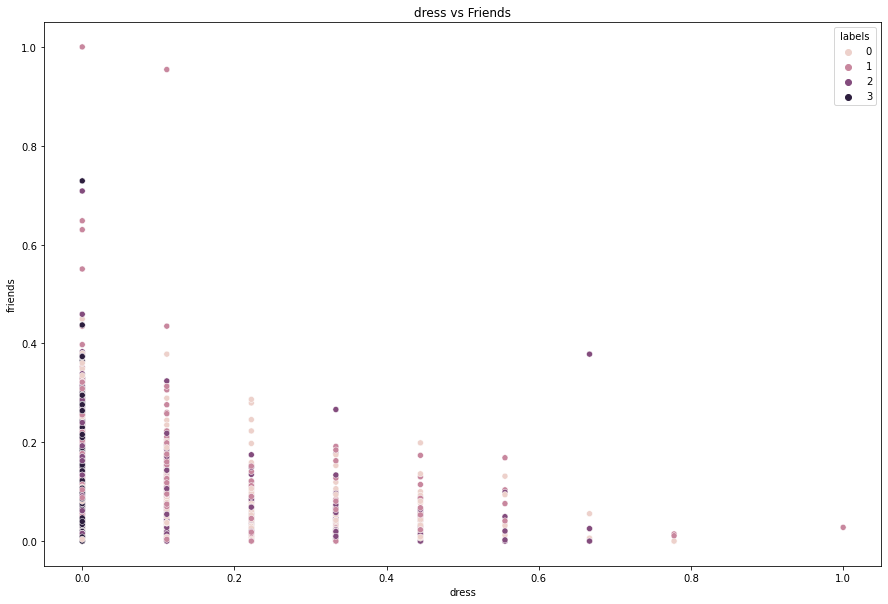

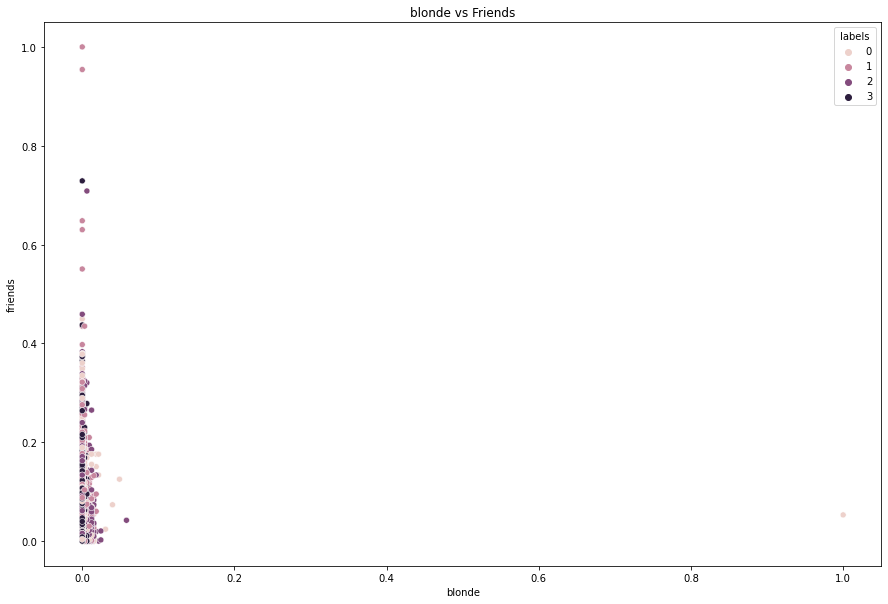

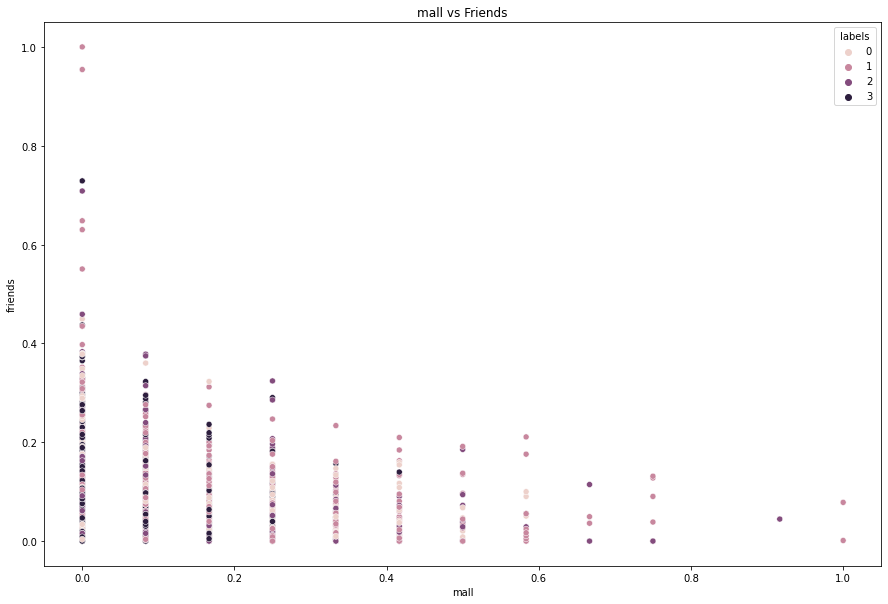

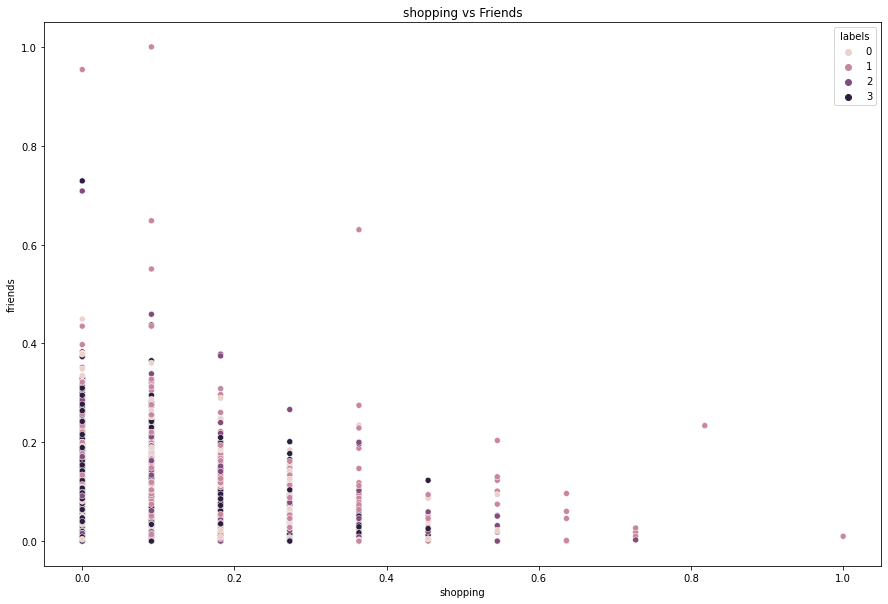

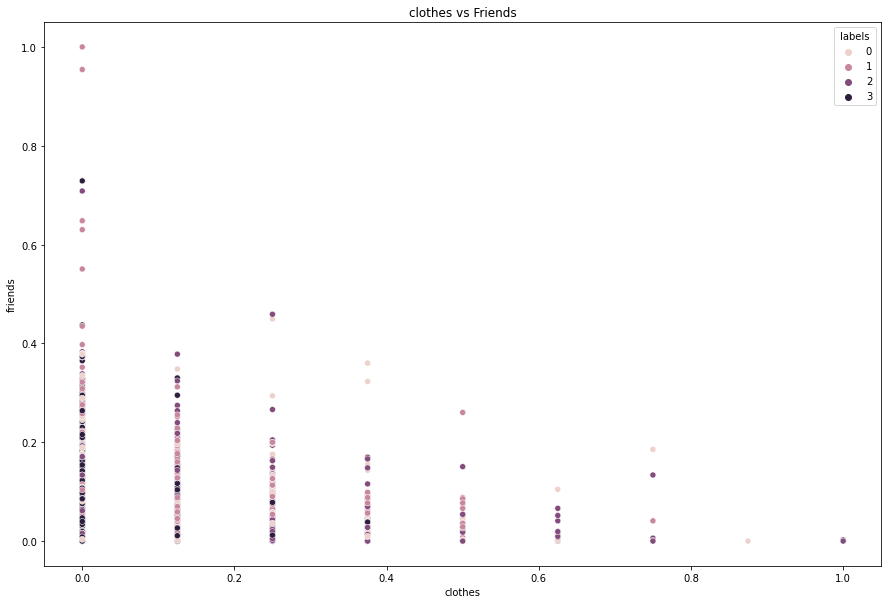

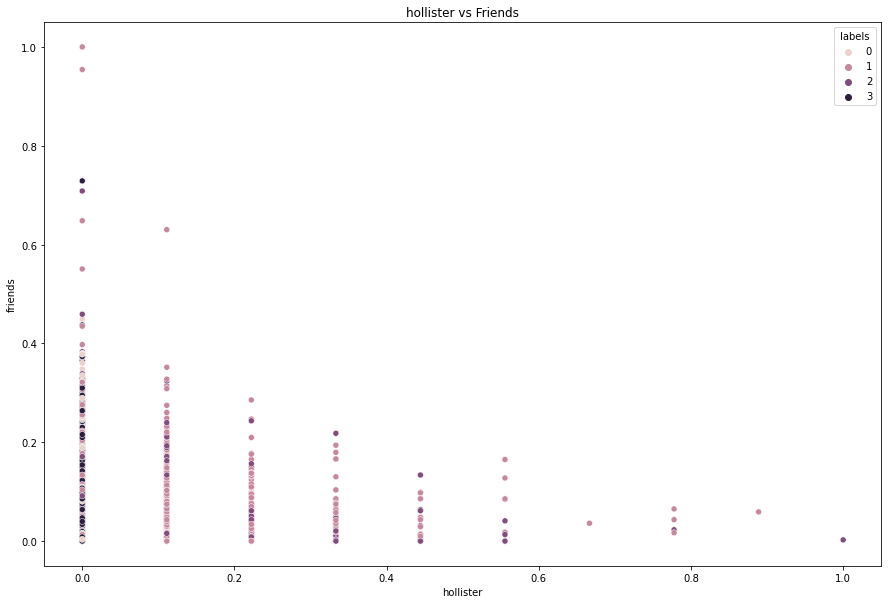

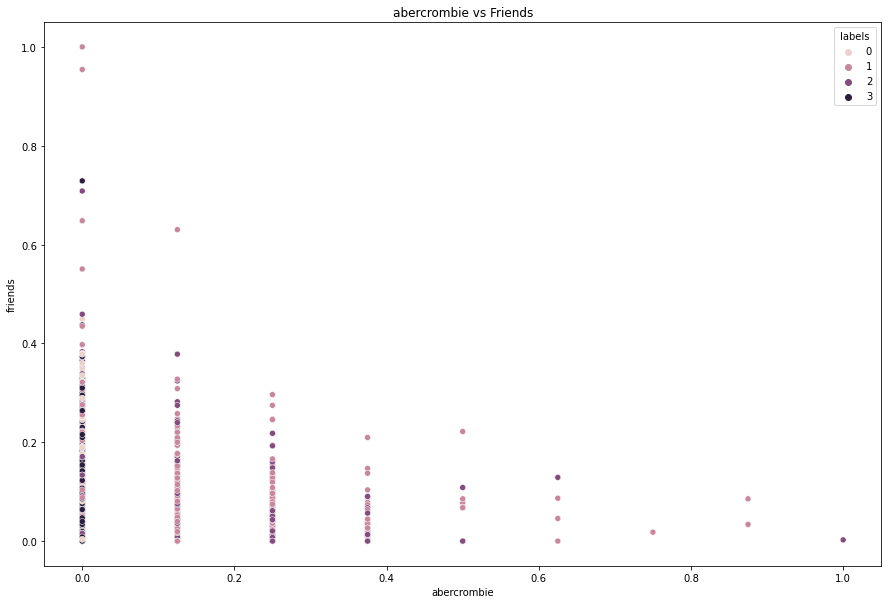

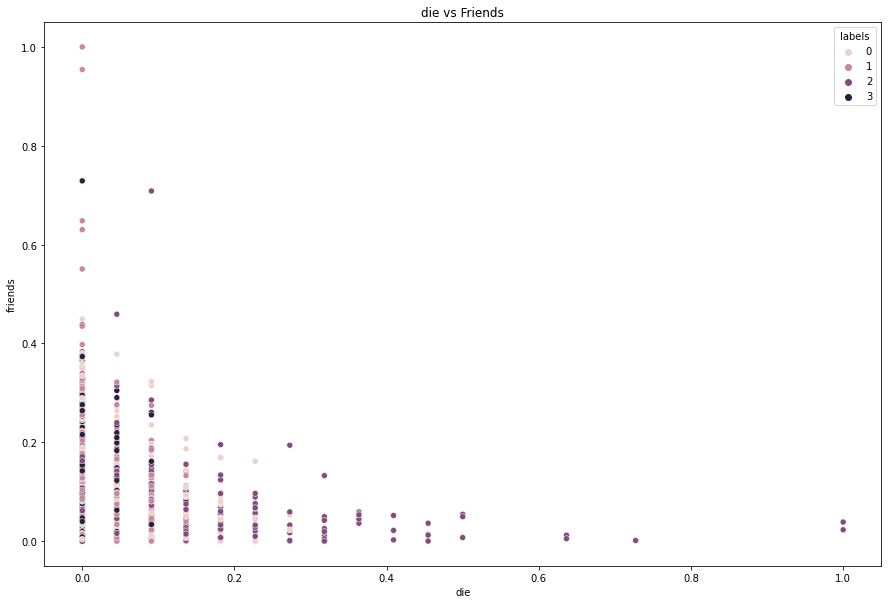

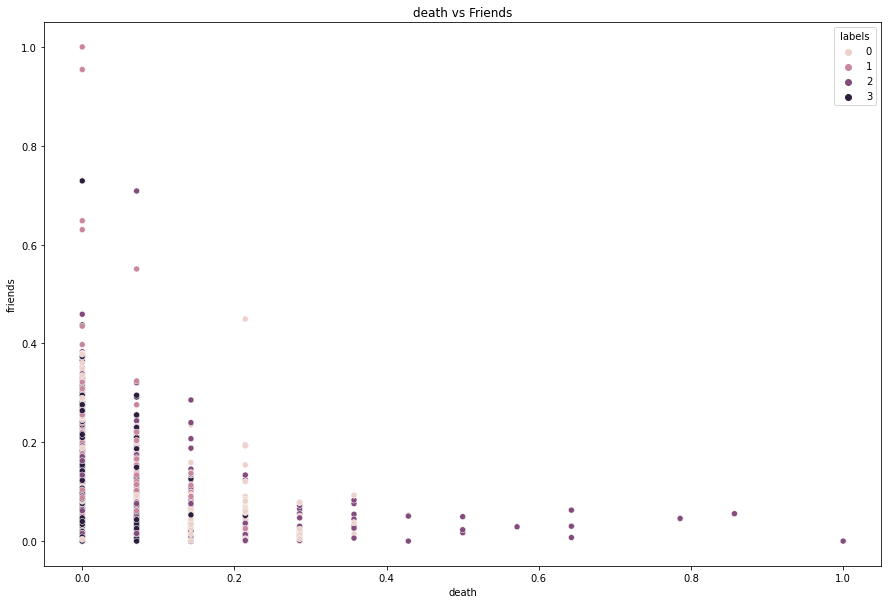

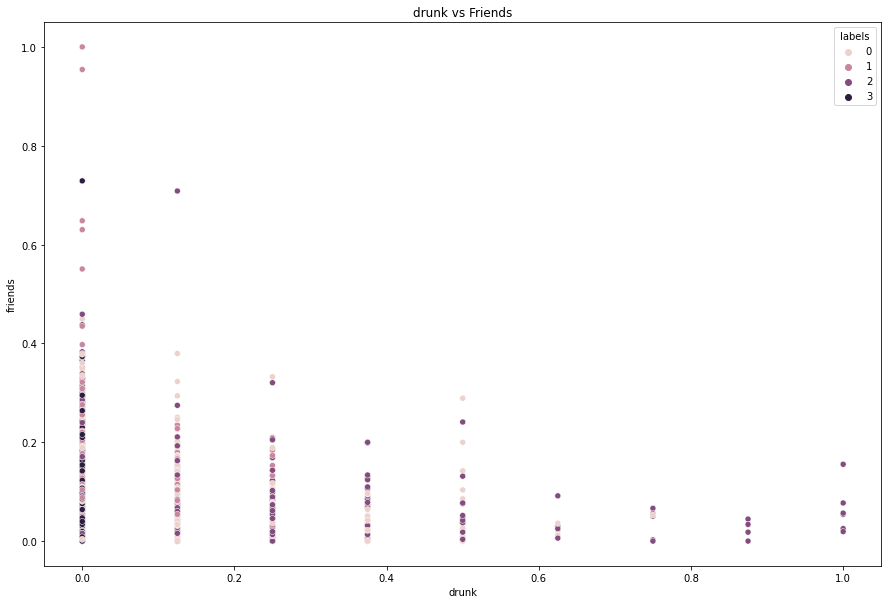

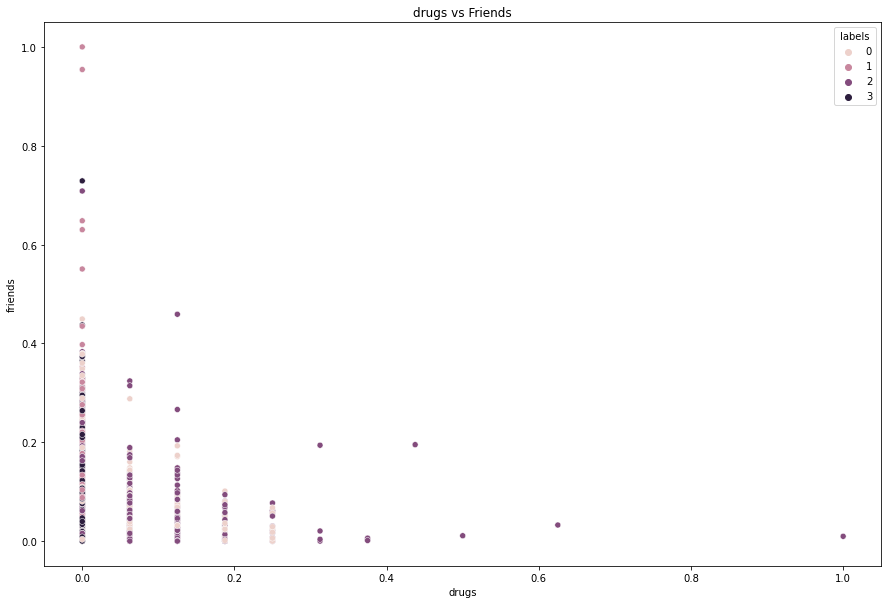

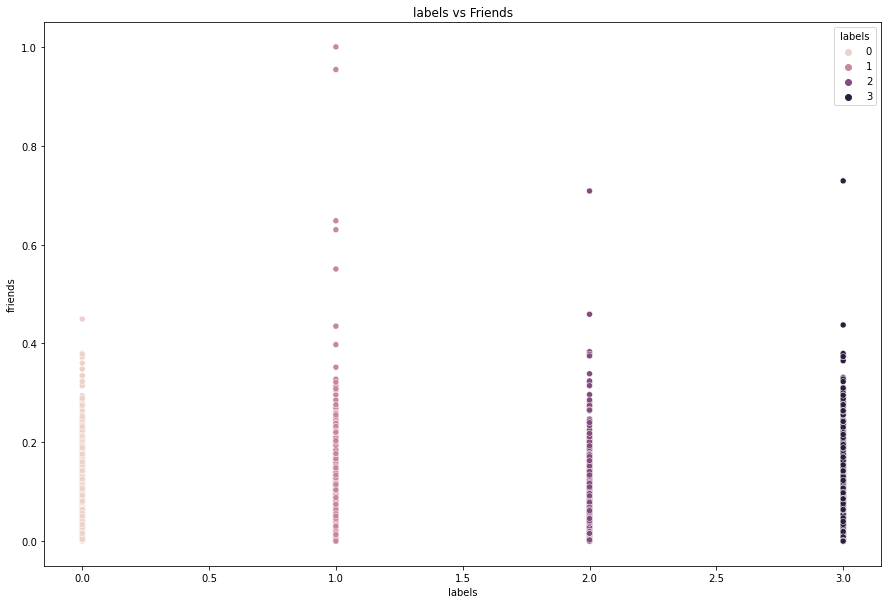

In [14]:
for column in data.columns:
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title(f"{column} vs Friends")
    ax = sns.scatterplot(x = column,y = 'friends', data = data, hue='labels')

In [28]:
data.groupby('labels').mean()

gradyear    gender       age   friends  basketball  football  \
labels                                                                 
0       0.490565  0.000000  0.395375  0.039391    0.006271  0.012420   
1       0.582175  0.000000  0.355694  0.047861    0.024866  0.027440   
2       0.510213  0.426988  0.408735  0.038389    0.019937  0.032108   
3       0.478549  0.231180  0.407794  0.031790    0.007256  0.012112   

          soccer  softball  volleyball  swimming  ...    blonde      mall  \
labels                                            ...                       
0       0.000000  0.015109    0.000000  0.003750  ...  0.000565  0.028627   
1       0.023283  0.034725    0.047984  0.009058  ...  0.000417  0.037813   
2       0.016321  0.012516    0.015310  0.007158  ...  0.000675  0.030530   
3       0.005411  0.000000    0.002848  0.002626  ...  0.000081  0.012291   

        shopping   clothes  hollister  abercrombie       die     death  \
labels                                                                   
0       0.039903  0.027066   0.000000     0.000000  0.011285  0.011555   
1       0.064730  0.029977   0.037720     0.031055  0.006828  0.007821   
2       0.033045  0.036115   0.019122     0.015906  0.020505  0.017284   
3       0.020508  0.008148   0.000000     0.000000  0.004706  0.004793   

           drunk     drugs  
labels                      
0       0.024441  0.007391  
1       0.010182  0.000000  
2       0.036115  0.017487  
3       0.000000  0.000000  

[4 rows x 40 columns]

In [16]:
#lABEL 0 and lABEL 1 INCLUDES ONLY M
#lABEL 2 INCLUDES ALL

